In [1]:
import pandas as pd
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from tqdm import tqdm
tqdm.pandas()

In [3]:
idendities = {
  "ITITIU17098": [],
  "ITITIU17097": [],
  "ITITIU17096": [],
  "ITITIU17086": [],
  "ITITIU17073": [],
  "ITITIU17067": [],
  "BAFNIU17003": [],
  "BAFNIU17091": []
}

In [4]:
import os
from PIL import Image

for key, values in idendities.items():
    # Get the path to all the images
        for image in os.listdir("Dataset/IU_student/{}".format(key)):
            path_string = os.path.join("Dataset/IU_student/{}".format(key), image)
            image = Image.open(path_string)
            imgNp = np.array(image, "uint8")
            values.append(path_string)


In [23]:
idendities["BAFNIU17003"]

['Dataset/IU_student/BAFNIU17003\\BAFNIU17003.jpg',
 'Dataset/IU_student/BAFNIU17003\\IMG_2069.JPG',
 'Dataset/IU_student/BAFNIU17003\\IMG_2070.JPG',
 'Dataset/IU_student/BAFNIU17003\\IMG_2073.JPG',
 'Dataset/IU_student/BAFNIU17003\\IMG_2076.JPG']

<h1>Positive samples<h1>
Find different photos of same people


In [5]:
positives = []

for key, values in idendities.items():
    
    #print(key)
    for i in range(0, len(values)-1):
        for j in range(i+1, len(values)):
            #print(values[i], " and ", values[j])
            positive = []
            positive.append(values[i])
            positive.append(values[j])
            positives.append(positive)

In [6]:
positives = pd.DataFrame(positives, columns = ["file_x", "file_y"])
positives["decision"] = "Yes"

In [7]:
positives.shape


(548, 3)

In [8]:
positives.head()

,file_x,file_y,decision
0,Dataset/IU_student/ITITIU17098\ITITIU17098_1.jpg,Dataset/IU_student/ITITIU17098\ITITIU17098_10-...,Yes
1,Dataset/IU_student/ITITIU17098\ITITIU17098_1.jpg,Dataset/IU_student/ITITIU17098\ITITIU17098_11-...,Yes
2,Dataset/IU_student/ITITIU17098\ITITIU17098_1.jpg,Dataset/IU_student/ITITIU17098\ITITIU17098_12-...,Yes
3,Dataset/IU_student/ITITIU17098\ITITIU17098_1.jpg,Dataset/IU_student/ITITIU17098\ITITIU17098_13-...,Yes
4,Dataset/IU_student/ITITIU17098\ITITIU17098_1.jpg,Dataset/IU_student/ITITIU17098\ITITIU17098_14-...,Yes


# Negative samples
Compare photos of different people

In [9]:
samples_list = list(idendities.values())


In [10]:
negatives = []

for i in range(0, len(idendities) - 1):
    for j in range(i+1, len(idendities)):
        #print(samples_list[i], " vs ",samples_list[j]) 
        cross_product = itertools.product(samples_list[i], samples_list[j])
        cross_product = list(cross_product)
        #print(cross_product)
        
        for cross_sample in cross_product:
            #print(cross_sample[0], " vs ", cross_sample[1])
            negative = []
            negative.append(cross_sample[0])
            negative.append(cross_sample[1])
            negatives.append(negative)

In [11]:
negatives = pd.DataFrame(negatives, columns = ["file_x", "file_y"])
negatives["decision"] = "No"

In [12]:
negatives = negatives.sample(positives.shape[0])


In [13]:
negatives.shape


(548, 3)

In [14]:
negatives.tail()

,file_x,file_y,decision
44,Dataset/IU_student/ITITIU17098\ITITIU17098_16-...,Dataset/IU_student/ITITIU17097\ITITIU17097_3.jpg,No
96,Dataset/IU_student/ITITIU17098\ITITIU17098_6-m...,Dataset/IU_student/ITITIU17097\ITITIU17097_1.jpg,No
251,Dataset/IU_student/ITITIU17098\ITITIU17098_12-...,Dataset/IU_student/ITITIU17073\ITITIU17073_12.jpg,No
621,Dataset/IU_student/ITITIU17098\ITITIU17098_15-...,Dataset/IU_student/ITITIU17067\ITITIU17067_6-m...,No
1947,Dataset/IU_student/ITITIU17073\ITITIU17073_6.jpg,Dataset/IU_student/ITITIU17067\ITITIU17067_5-m...,No


# Merge Positives and Negative Samples¶


In [15]:
df = pd.concat([positives, negatives]).reset_index(drop = True)


In [16]:
df.shape


(1096, 3)

In [17]:
df.decision.value_counts()


Yes    548
No     548
Name: decision, dtype: int64

In [18]:
df = pd.concat([positives, negatives]).reset_index(drop = True)

In [19]:
df.decision

0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
1091     No
1092     No
1093     No
1094     No
1095     No
Name: decision, Length: 1096, dtype: object

# DeepFace

In [20]:
from deepface import DeepFace
from deepface.basemodels import VGGFace, OpenFace, Facenet, FbDeepFace

In [21]:
pretrained_models = {}

pretrained_models["VGG-Face"] = VGGFace.loadModel()
print("VGG-Face loaded")

pretrained_models["Facenet"] = Facenet.loadModel()
print("Facenet loaded")

# pretrained_models["OpenFace"] = OpenFace.loadModel() 
# print("OpenFace loaded")

pretrained_models["DeepFace"] = FbDeepFace.loadModel()
print("FbDeepFace loaded")

VGG-Face loaded
Facenet loaded
FbDeepFace loaded


In [22]:
instances = df[["file_x", "file_y"]].values.tolist()


In [23]:
instances

[['Dataset/IU_student/ITITIU17098\\ITITIU17098_1.jpg',
  'Dataset/IU_student/ITITIU17098\\ITITIU17098_10-min.JPG'],
 ['Dataset/IU_student/ITITIU17098\\ITITIU17098_1.jpg',
  'Dataset/IU_student/ITITIU17098\\ITITIU17098_11-min.JPG'],
 ['Dataset/IU_student/ITITIU17098\\ITITIU17098_1.jpg',
  'Dataset/IU_student/ITITIU17098\\ITITIU17098_12-min.JPG'],
 ['Dataset/IU_student/ITITIU17098\\ITITIU17098_1.jpg',
  'Dataset/IU_student/ITITIU17098\\ITITIU17098_13-min.JPG'],
 ['Dataset/IU_student/ITITIU17098\\ITITIU17098_1.jpg',
  'Dataset/IU_student/ITITIU17098\\ITITIU17098_14-min.JPG'],
 ['Dataset/IU_student/ITITIU17098\\ITITIU17098_1.jpg',
  'Dataset/IU_student/ITITIU17098\\ITITIU17098_15-min.JPG'],
 ['Dataset/IU_student/ITITIU17098\\ITITIU17098_1.jpg',
  'Dataset/IU_student/ITITIU17098\\ITITIU17098_16-min.JPG'],
 ['Dataset/IU_student/ITITIU17098\\ITITIU17098_1.jpg',
  'Dataset/IU_student/ITITIU17098\\ITITIU17098_17-min.JPG'],
 ['Dataset/IU_student/ITITIU17098\\ITITIU17098_1.jpg',
  'Dataset/IU_stu

In [24]:
# models = ['VGG-Face', 'Facenet', 'DeepFace']
models = ['DeepFace']

metrics = ['cosine', 'euclidean', 'euclidean_l2']

In [25]:
if True:
    for model in models:
        for metric in metrics:
            
            print("Processing ",model," ",metric)
            
            if model == 'OpenFace' and metric == 'euclidean': #this returns same with openface euclidean l2
                continue
            else:
                resp_obj = DeepFace.verify(instances
                                           , model_name = model
                                           , model = pretrained_models[model]
                                           , distance_metric = metric
                                           , detector_backend = 'mtcnn'
                                           , enforce_detection = False)

                distances = []

                for i in range(0, len(instances)):
                    distance = round(resp_obj["pair_%s" % (i+1)]["distance"], 4)
                    distances.append(distance)

                df['%s_%s' % (model, metric)] = distances
        df_raw = df
        df_raw.to_csv("IU_student_{}_{}.csv".format(model, metric), index = False)
    df.to_csv("IU_student_face-recognition-pivot_final.csv", index = False)
else:
    #Ref: https://github.com/serengil/deepface/blob/master/tests/dataset/face-recognition-pivot.csv
    df = pd.read_csv("IU_student_face-recognition-pivot_final.csv")

Processing  DeepFace   cosine


Verification: 100%|██████████| 1096/1096 [5:21:46<00:00, 17.62s/it] 


Processing  DeepFace   euclidean


Verification: 100%|██████████| 1096/1096 [5:08:19<00:00, 16.88s/it] 


Processing  DeepFace   euclidean_l2


Verification: 100%|██████████| 1096/1096 [5:08:29<00:00, 16.89s/it] 


In [ ]:
df_raw = df.copy()


In [ ]:
df.head()


# Distribution

In [ ]:
df = pd.read_csv("face-recognition-pivot.csv")

In [42]:
df = pd.read_csv("IU_student_final.csv")

In [43]:
df_raw = df.copy()


In [44]:
df.head()

,file_x,file_y,decision,VGG-Face_cosine,VGG-Face_euclidean,VGG-Face_euclidean_l2,Facenet_cosine,Facenet_euclidean,Facenet_euclidean_l2,DeepFace_cosine,DeepFace_euclidean,DeepFace_euclidean_l2
0,Dataset/IU_student/ITITIU17098\ITITIU17098_1.jpg,Dataset/IU_student/ITITIU17098\ITITIU17098_10-...,Yes,0.1472,0.3275,0.5425,0.2567,8.6824,0.7166,0.3690,69.0953,0.8591
1,Dataset/IU_student/ITITIU17098\ITITIU17098_1.jpg,Dataset/IU_student/ITITIU17098\ITITIU17098_11-...,Yes,0.1428,0.3334,0.5345,0.3593,10.1230,0.8477,0.3246,69.0697,0.8057
2,Dataset/IU_student/ITITIU17098\ITITIU17098_1.jpg,Dataset/IU_student/ITITIU17098\ITITIU17098_12-...,Yes,0.1442,0.3246,0.5371,0.2532,8.5303,0.7116,0.3642,66.0010,0.8535
3,Dataset/IU_student/ITITIU17098\ITITIU17098_1.jpg,Dataset/IU_student/ITITIU17098\ITITIU17098_13-...,Yes,0.1350,0.3150,0.5195,0.2885,9.0925,0.7596,0.3602,65.8912,0.8488
4,Dataset/IU_student/ITITIU17098\ITITIU17098_1.jpg,Dataset/IU_student/ITITIU17098\ITITIU17098_14-...,Yes,0.1463,0.3299,0.5409,0.2498,8.4978,0.7069,0.3263,63.5567,0.8079


In [45]:
models = ['VGG-Face', 'Facenet', 'DeepFace']

metrics = ['cosine', 'euclidean', 'euclidean_l2']

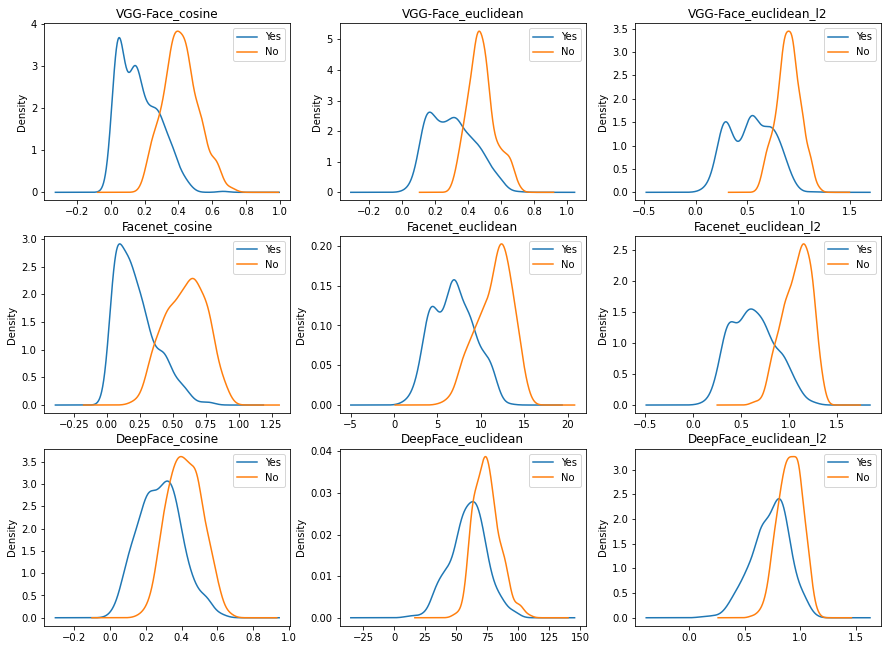

In [46]:


fig = plt.figure(figsize=(15, 15))

figure_idx = 1
for model in models:
    for metric in metrics:
        
        
        feature = '%s_%s' % (model, metric)

        ax1 = fig.add_subplot(4, 3, figure_idx)
        
        df[df.decision == "Yes"][feature].plot(kind='kde', title = feature, label = 'Yes', legend = True)
        df[df.decision == "No"][feature].plot(kind='kde', title = feature, label = 'No', legend = True)
        
        figure_idx = figure_idx + 1

plt.show()

# Pre-processing for model

In [47]:
columns = []
for model in models:
    for metric in metrics:
        if model == 'OpenFace' and metric == 'euclidean':
            continue
        else:
            feature = '%s_%s' % (model, metric)
            columns.append(feature)

columns.append("decision")

In [48]:
df = df[columns]


In [49]:

df.loc[df[df.decision == 'Yes'].index, 'decision'] = 1
df.loc[df[df.decision == 'No'].index, 'decision'] = 0

In [50]:
df.head()


,VGG-Face_cosine,VGG-Face_euclidean,VGG-Face_euclidean_l2,Facenet_cosine,Facenet_euclidean,Facenet_euclidean_l2,DeepFace_cosine,DeepFace_euclidean,DeepFace_euclidean_l2,decision
0,0.1472,0.3275,0.5425,0.2567,8.6824,0.7166,0.3690,69.0953,0.8591,1
1,0.1428,0.3334,0.5345,0.3593,10.1230,0.8477,0.3246,69.0697,0.8057,1
2,0.1442,0.3246,0.5371,0.2532,8.5303,0.7116,0.3642,66.0010,0.8535,1
3,0.1350,0.3150,0.5195,0.2885,9.0925,0.7596,0.3602,65.8912,0.8488,1
4,0.1463,0.3299,0.5409,0.2498,8.4978,0.7069,0.3263,63.5567,0.8079,1


In [65]:
print(df.info()) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VGG-Face_cosine        1096 non-null   float64
 1   VGG-Face_euclidean     1096 non-null   float64
 2   VGG-Face_euclidean_l2  1096 non-null   float64
 3   Facenet_cosine         1096 non-null   float64
 4   Facenet_euclidean      1096 non-null   float64
 5   Facenet_euclidean_l2   1096 non-null   float64
 6   DeepFace_cosine        1096 non-null   float64
 7   DeepFace_euclidean     1096 non-null   float64
 8   DeepFace_euclidean_l2  1096 non-null   float64
 9   decision               1096 non-null   object 
dtypes: float64(9), object(1)
memory usage: 85.8+ KB
None


# Train test split

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
df_train, df_test = train_test_split(df, test_size=0.5, random_state=34)


In [54]:
target_name = "decision"

y_train = df_train[target_name].values
x_train = df_train.drop(columns=[target_name]).values

y_test = df_test[target_name].values
x_test = df_test.drop(columns=[target_name]).values

In [55]:
np.shape(x_train), np.shape(y_train), np.shape(x_test), np.shape(y_test)

((548, 9), (548,), (548, 9), (548,))

# lightGBM


In [ ]:
!pip install lightgbm

In [16]:
import lightgbm as lgb


In [17]:
features = df.drop(columns=[target_name]).columns.tolist()

lgb_train = lgb.Dataset(x_train, y_train, feature_name = features)
lgb_test = lgb.Dataset(x_test, y_test, feature_name = features)

In [20]:
params = {
    'task': 'train'
    , 'boosting_type': 'gbdt'
    , 'objective': 'multiclass'
    , 'num_class': 2
    , 'metric': 'multi_logloss'
    , 'force_col_wise': 'true'
}

In [24]:
gbm = lgb.train(params, lgb_train, num_boost_round=400, early_stopping_rounds = 20 , valid_sets=[lgb_test])
# gbm = lgb.train(params, lgb_train, num_boost_round=400, valid_sets=[lgb_test])


[LightGBM] [Info] Total Bins 1647
[LightGBM] [Info] Number of data points in the train set: 548, number of used features: 9
[LightGBM] [Info] Start training from score -0.753316
[LightGBM] [Info] Start training from score -0.636394
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's multi_logloss: 0.631708
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's multi_logloss: 0.57791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's multi_logloss: 0.5338
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [ ]:
gbm.save_model("face-recognition-ensemble-model.txt")


# Evaluation

In [25]:
predictions = gbm.predict(x_test)


In [26]:
prediction_classes = []
classified = 0

index = 0
for prediction in predictions:
    prediction_class = np.argmax(prediction)
    prediction_classes.append(prediction_class)
    
    actual = y_test[index]
    
    print("prediction is ",prediction_class," whereas actual is ",actual)
    if actual == prediction_class:
        classified = classified + 1
    
    index = index + 1

#print(classified," instances are classified in ",len(predictions)," instances") 
print("accuracy: ",round(100*classified/len(predictions),2),"%")

prediction is  1  whereas actual is  1
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  1  whereas actual is  1
prediction is  0  whereas actual is  0
prediction is  1  whereas actual is  1
prediction is  0  whereas actual is  0
prediction is  1  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  1  whereas actual is  1
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  1
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  1  whereas actual is  1
prediction is  0  whereas actual is  0
prediction is  1  whereas actual is  1
prediction is  1  whereas actual is  1
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  1  whereas actual is  1
prediction is  0  whereas actual is  1
prediction is  0  whereas actual is  0
prediction is  0  whereas

prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  1  whereas actual is  1
prediction is  1  whereas actual is  1
prediction is  0  whereas actual is  0
prediction is  1  whereas actual is  1
prediction is  1  whereas actual is  1
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  1  whereas actual is  1
prediction is  1  whereas actual is  1
prediction is  0  whereas actual is  0
prediction is  1  whereas actual is  1
prediction is  1  whereas actual is  1
prediction is  0  whereas actual is  0
prediction is  1  whereas actual is  1
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  0
prediction is  0  whereas actual is  1
prediction is  1  whereas actual is  1
prediction is  0  whereas actual is  0
prediction is  1  whereas actual is  1
prediction is  0  whereas

In [27]:
print(classified," instances are classified in ",len(predictions)," instances") 


494  instances are classified in  548  instances


In [28]:
print(y_test), print(prediction_classes)

[1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1
 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1
 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1
 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0
 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1
 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1
 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0
 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0
 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0
 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1
 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0
 0 0 0 0 1 1 0 1 1 0 1 0 

(None, None)

In [29]:
prediction_classes_test = np.array(prediction_classes) 
y_test_arr = y_test


print(y_test_arr.tolist()), print(prediction_classes)

[1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 

(None, None)

In [30]:
cm = confusion_matrix(y_test_arr.tolist(), prediction_classes_test)

In [31]:
cm

array([[269,  21],
       [ 33, 225]], dtype=int64)

In [32]:
tn, fp, fn, tp = cm.ravel()


In [33]:
tn, fp, fn, tp


(269, 21, 33, 225)

In [34]:
recall = tp / (tp + fn)
precision = tp / (tp + fp)
accuracy = (tp + tn)/(tn + fp +  fn + tp)
f1 = 2 * (precision * recall) / (precision + recall)

In [35]:
print("Precision: ", 100*precision,"%")
print("Recall: ", 100*recall,"%")
print("F1 score ",100*f1, "%")
print("Accuracy: ", 100*accuracy,"%")

Precision:  91.46341463414635 %
Recall:  87.20930232558139 %
F1 score  89.28571428571429 %
Accuracy:  90.14598540145985 %


<Figure size 504x504 with 0 Axes>

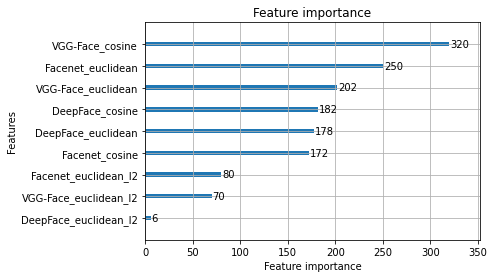

In [36]:
plt.figure(figsize=(7,7))
ax = lgb.plot_importance(gbm, max_num_features=20)
plt.show()

In [37]:
y_pred_proba = predictions[::,1]


In [38]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test_arr.tolist(),  y_pred_proba)
auc = metrics.roc_auc_score(y_test_arr.tolist(), y_pred_proba)

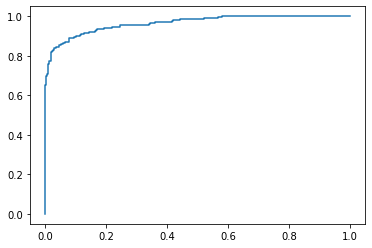

In [39]:
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))

In [70]:
pip install graphviz 

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'e:\pre-thesis\project\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
deepface_ensemble = lgb.Booster(model_file= 'face-recognition-ensemble-model.txt')


In [ ]:
bulk_predictions = deepface_ensemble.predict(testImage)
print(bulk_predictions)

In [ ]:
testImage = Image.open("Test_img/demo1.jpg")
testimgNp = np.array(image, "uint8")

In [ ]:
demo = lgb.Booster(model_file= 'Train/face-recognition-ensemble-model.txt')


In [ ]:
demo.predict(x_test)